<a href="https://colab.research.google.com/github/ZoyaAfzal/25-Python-Projects/blob/main/PhotoManipulation_inPythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

# Create folders for input and output
os.makedirs('input', exist_ok=True)
os.makedirs('output', exist_ok=True)


In [42]:
from google.colab import files
uploaded = files.upload()

import shutil

shutil.move(next(iter(uploaded)), 'greenlandscape.png')


Saving greenlandscape.png.png to greenlandscape.png.png


'greenlandscape.png'

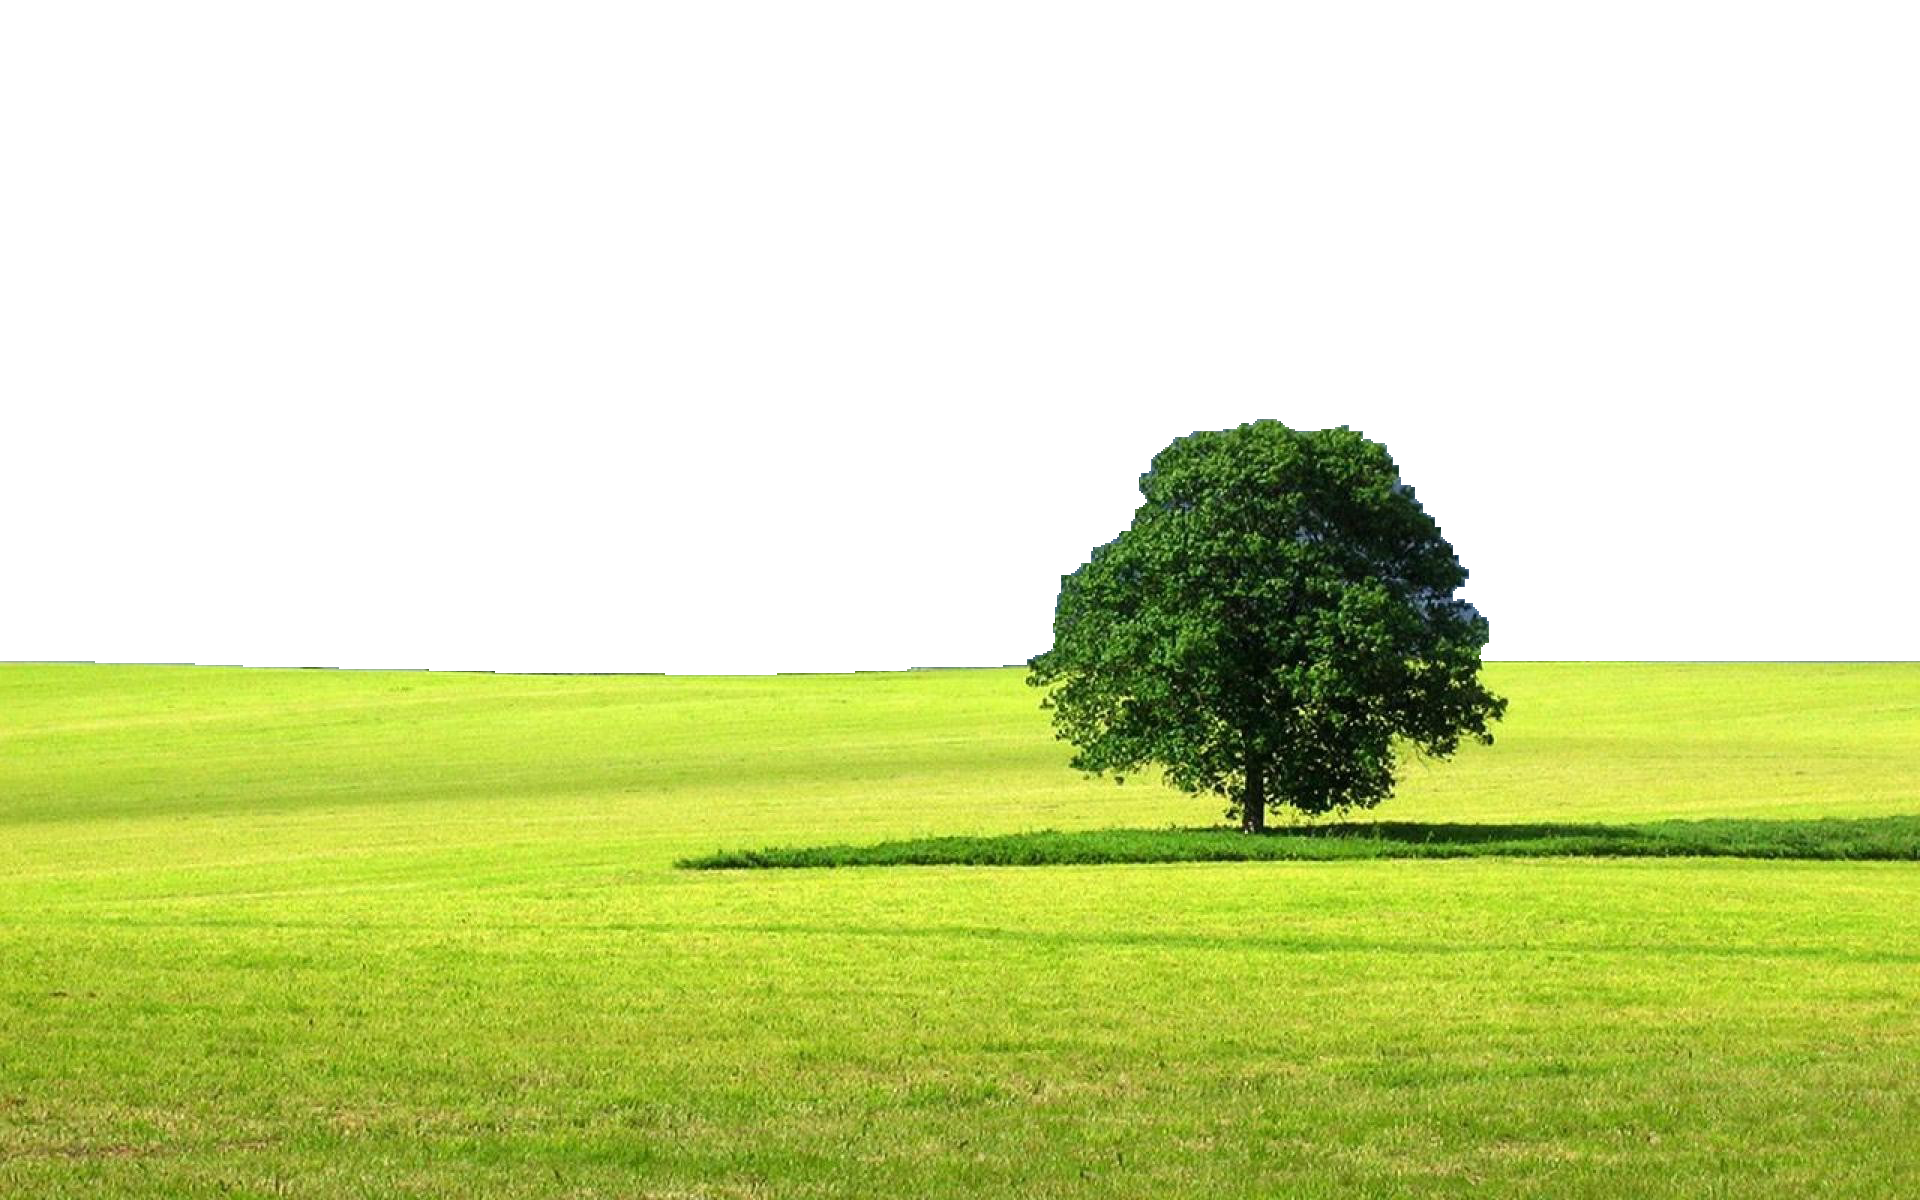

In [60]:
from IPython.display import Image as IPyImage, display
display(IPyImage(filename='output_greenlandscape.png'))

In [55]:
from PIL import Image as PILImage
import numpy as np
import os

class Image:
    def __init__(self, filename=''):
        if not filename:
            raise ValueError("You must provide a filename.")
        self.filename = filename
        self.array = self.read_image(filename)
        self.x_pixels = self.array.shape[1]
        self.y_pixels = self.array.shape[0]
        self.num_channels = self.array.shape[2]

    def read_image(self, filename):
        # Open image and convert to RGB
        image = PILImage.open(filename).convert('RGB')
        return np.asarray(image) / 255.0  # Normalize to [0, 1]

    def write_image(self, output_filename):
        # Convert back to image format
        img = np.clip(self.array * 255.0, 0, 255).astype(np.uint8)
        img_pil = PILImage.fromarray(img)
        img_pil.save(output_filename)
        print(f"Image saved as {output_filename}")

if __name__ == '__main__':
    im = Image(filename='greenlandscape.png')  # Load original

    # Convert to grayscale using average method
    grayscale_array = im.array.mean(axis=2, keepdims=True)  # shape: (H, W, 1)
    im.array = np.repeat(grayscale_array, 3, axis=2)  # Convert to 3-channel RGB

    im.write_image('output_grayscale.png')






Image saved as output_grayscale.png


In [56]:
from google.colab import files
files.download('output_grayscale.png')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

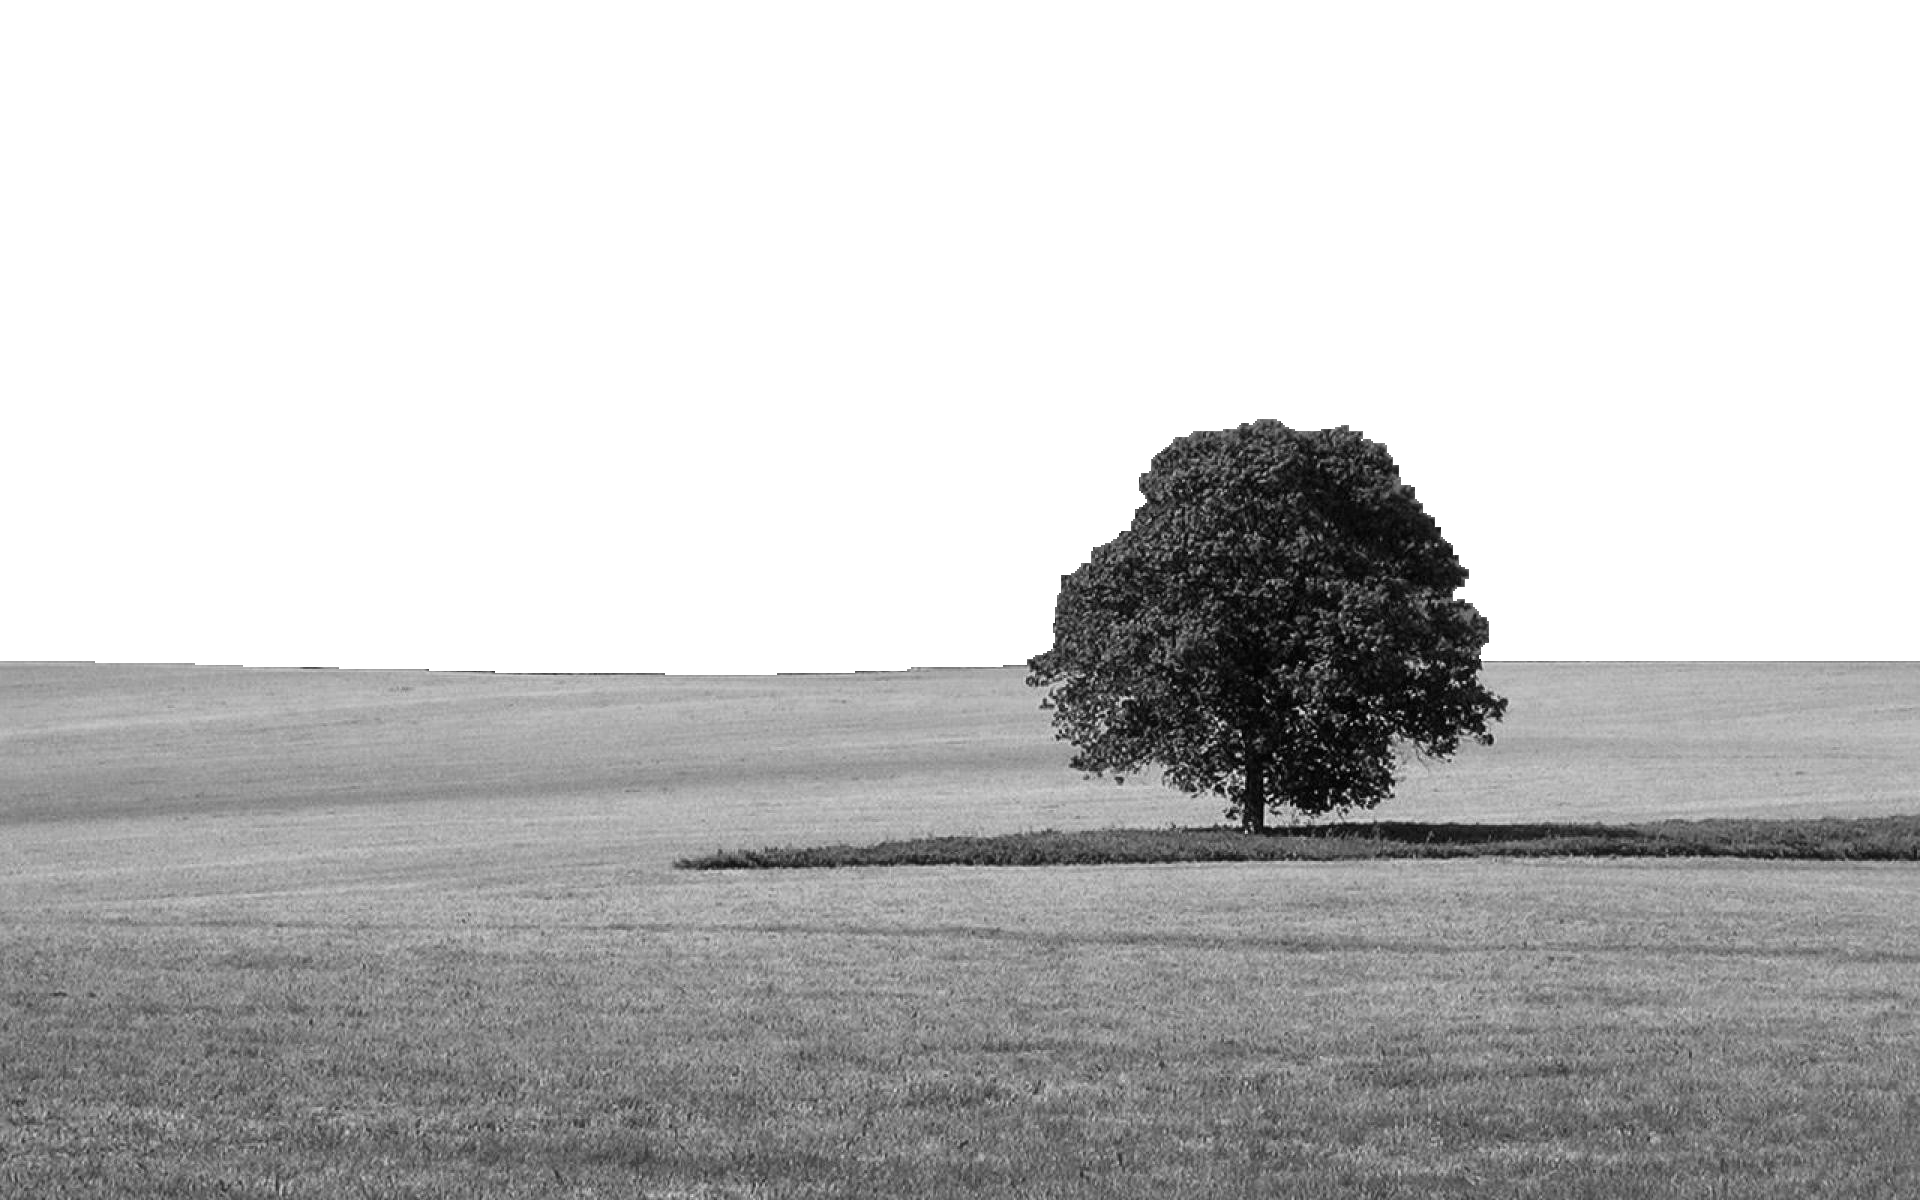

In [59]:
from IPython.display import Image as IPyImage, display
display(IPyImage(filename='output_grayscale.png'))
